---
title: "Working with time-series from the USGS"
format: html
jupyter: python3
execute:
  eval: true
---

## Working with time-series from the USGS
In this notebook we'll walk you through how to access data from the
USGS Water Data initiative. We'll look at a USGS stream gage that
monitors flows on the White River located near Oglala, SD.

Read more about this USGS stream gage here:
<https://waterdata.usgs.gov/monitoring-location/USGS-06446000/>

In [1]:
#| label: install-deps
#| eval: false
# !pip install --quiet geopandas hvplot geoviews dataretrieval contextily

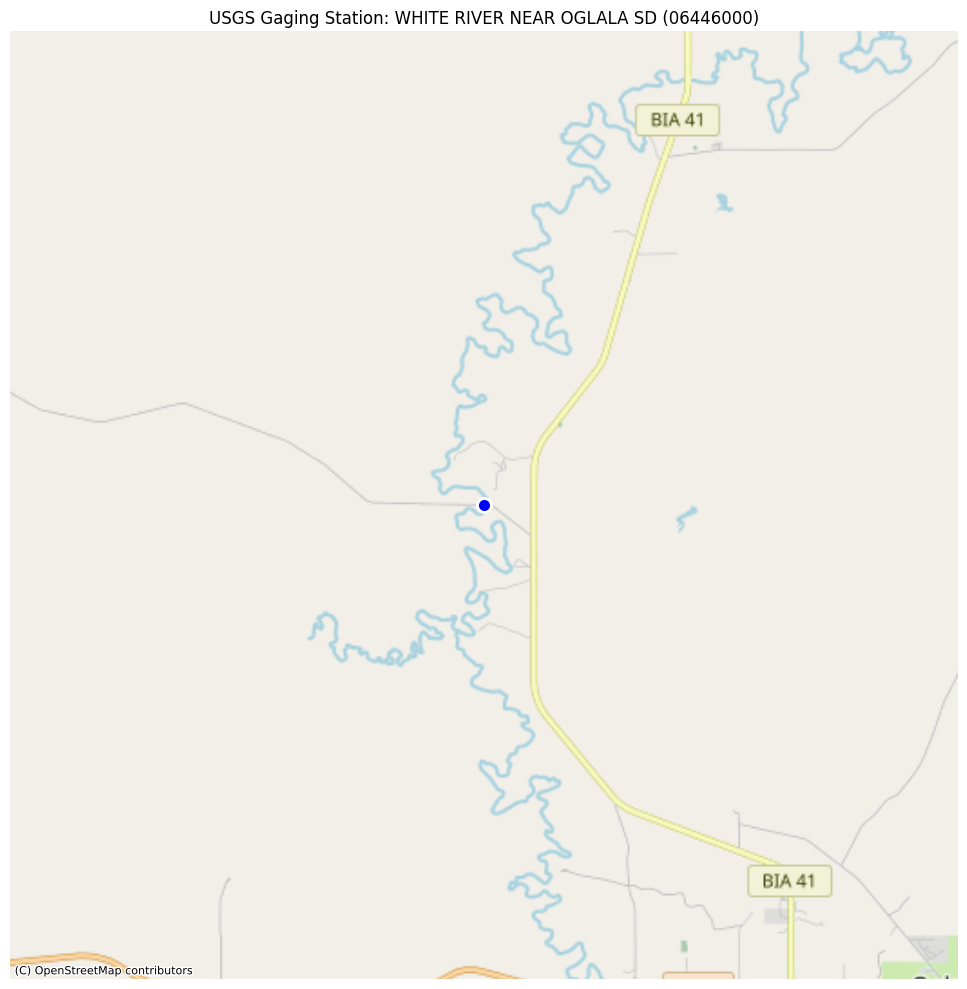

/Users/brianyandell/miniconda3/lib/python3.12/site-packages/dataretrieval/nwis.py:692: UserWarning: WARNING: Starting in March 2024, the NWIS qw data endpoint is retiring and no longer receives updates. For more information, refer to https://waterdata.usgs.gov.nwis/qwdata and https://doi-usgs.github.io/dataRetrieval/articles/Status.html or email CompTools@usgs.gov.
  warnings.warn(


:Curve   [datetime]   (00060)

datetime
1990-10-01 00:00:00+00:00    2.177465
1990-10-02 00:00:00+00:00    2.043750
1990-10-03 00:00:00+00:00    1.272917
1990-10-04 00:00:00+00:00    0.696979
1990-10-05 00:00:00+00:00    0.498646
Freq: D, Name: 00060, dtype: float64


In [2]:
#| label: fetch-data
from landmapy.usgs import get_usgs_data, find_usgs_site, get_site_metadata, plot_usgs_map

# Find the site information dynamically
sites = find_usgs_site("White River near Oglala", "SD")

if not sites.empty:
    site_info = sites.iloc[0]
    site_id = site_info['site_no']
    
    # Plot the site location on a map (static)
    plot_usgs_map(
        site_id=site_id,
        site_name=site_info['station_nm'],
        latitude=site_info['dec_lat_va'],
        longitude=site_info['dec_long_va']
    )
    
    # Get available parameters and period of record
    meta = get_site_metadata(site_id)
    
    df_daily = get_usgs_data(
        site_id=site_id,
        parameters=meta['parameters'],
        start_date=meta['start_date'],
        end_date=meta['end_date'],
        plot_series=True,
        site_name=site_info['station_nm']
    )
    print(df_daily.head())
else:
    print("Site not found.")

### Interactive Map (Optional)

This section displays an interactive map using `hvplot` if you are running this in a Jupyter notebook or interactive session.

In [3]:
#| label: interactive-map
from IPython import get_ipython

# Display the interactive map only in interactive sessions
if get_ipython() is not None and "IPKernelApp" in get_ipython().config:
    from landmapy.usgs import hvplot_usgs_map
    hvplot_usgs_map(
        site_id=site_id,
        site_name=site_info['station_nm'],
        latitude=site_info['dec_lat_va'],
        longitude=site_info['dec_long_va']
    )
else:
    print("Interactive map skipped (non-interactive session).")

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Name,Site)

# Now it is your turn
Think of a heavy rainfall, flood, drought, or other hydrologic event
that you would like to tell a story about using data. When did the
event take place? Where did it happen?

Select a USGS gaging station that will help you tell this data story.

USGS NWIS Mapper:
<https://maps.waterdata.usgs.gov/mapper/index.html>

Once you have the unique site number and lat/lon, you can either:

* Modify the code above that we used to look at the White River
* Copy and paste the code from above, and then modify

Add new code cells by with the `+ Code` button on the ribbon at the
top of this notebook.

# Answer the following questions.
# (**You can make edits to this text box by double clicking**)
Site number:

Site location:

Hydrologic event of interest:

Why did you select this location/event?